#Introduccion

La empresa TelecomX ha presentado una evasion de clientes significativa, por lo cual nos ha consultado para realizar un analisis de distintos aspectos que nos ayuden a identificar una tendencia para la evasion. Y de esta manera, ofrecer soluciones que aseguren la permanencia de sus clientes en el servicio.

#Extraccion de los datos#

In [1]:
import pandas as pd

datos = pd.read_json('/content/TelecomX_Data.json')

datos

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


##Conoce el conjunto de datos

In [2]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [3]:
datos.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


##Comprobación de incoherencias en los datos/ Manejo de inconsistencias

 Limpieza y Tratamiento de Datos. En esta etapa eliminamos datos nulos y establacemos el indice del dataframe para que haya una correcta correlacion entre los distintos df que utilicemos.

In [4]:
datos.set_index('customerID', inplace=True)
datos

,Churn,customer,phone,internet,account
customerID,,,,,
0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...
9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [5]:
datos1 = pd.json_normalize(datos['account'])
datos1.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


##Columna Cuentas diarias

In [6]:
datos1['cuentasdiarias'] = datos1['Charges.Monthly'] / 30
datos1.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,cuentasdiarias
0,One year,Yes,Mailed check,65.6,593.3,2.186667
1,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


##Analisis descriptivo

In [7]:
datos1['cuentasdiarias'].mean()


np.float64(2.1573365900646757)

In [8]:
datos1['cuentasdiarias'].median()

2.3433333333333333

In [9]:
datos1['cuentasdiarias'].std()

1.0043190628555607

##Distribucion de la evasion

In [10]:
datos['Churn'].dropna()


,Churn
customerID,
0002-ORFBO,No
0003-MKNFE,No
0004-TLHLJ,Yes
0011-IGKFF,Yes
0013-EXCHZ,Yes
...,...
9987-LUTYD,No
9992-RRAMN,Yes
9992-UJOEL,No


In [11]:
datos['Churn'] = datos['Churn'].replace({'NuloNNulooNulo': 'No', 'NuloYNuloeNulosNulo': 'Yes', 'Nulo': 'SinDatos'})

In [12]:
conteo = datos['Churn'].value_counts()
print(conteo)

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


In [13]:
import matplotlib.pyplot as plt

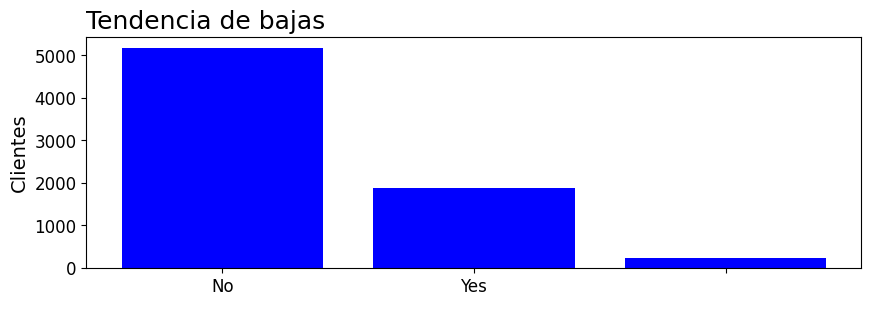

In [14]:
fig, ax = plt.subplots(figsize=(10, 3))

ax.bar(conteo.index, conteo,color = 'blue')
ax.set_title('Tendencia de bajas', loc= 'left', fontsize= 18)
ax.set_xlabel(' ')
ax.set_ylabel('Clientes', fontsize= 14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

En el grafico anterior podemos observar la tendencia de bajas general, en donde casi 2000 clientes decidieron suspender su servicio.

##Recuento de evasión por variables categóricas

In [15]:
datosG = pd.json_normalize(datos['customer'])
datosG.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [16]:
datosG.set_index(datos.index, inplace=True)
datosG

,gender,SeniorCitizen,Partner,Dependents,tenure
customerID,,,,,
0002-ORFBO,Female,0,Yes,Yes,9
0003-MKNFE,Male,0,No,No,9
0004-TLHLJ,Male,0,No,No,4
0011-IGKFF,Male,1,Yes,No,13
0013-EXCHZ,Female,1,Yes,No,3
...,...,...,...,...,...
9987-LUTYD,Female,0,No,No,13
9992-RRAMN,Male,0,Yes,No,22
9992-UJOEL,Male,0,No,No,2


In [17]:
datosG['Churn'] = datos['Churn']
display(datosG.head())

,gender,SeniorCitizen,Partner,Dependents,tenure,Churn
customerID,,,,,,
0002-ORFBO,Female,0,Yes,Yes,9,No
0003-MKNFE,Male,0,No,No,9,No
0004-TLHLJ,Male,0,No,No,4,Yes
0011-IGKFF,Male,1,Yes,No,13,Yes
0013-EXCHZ,Female,1,Yes,No,3,Yes


In [18]:
conteoG = datosG[datosG['Churn'] == 'Yes']['gender'].value_counts()
print(conteoG)

gender
Female    939
Male      930
Name: count, dtype: int64


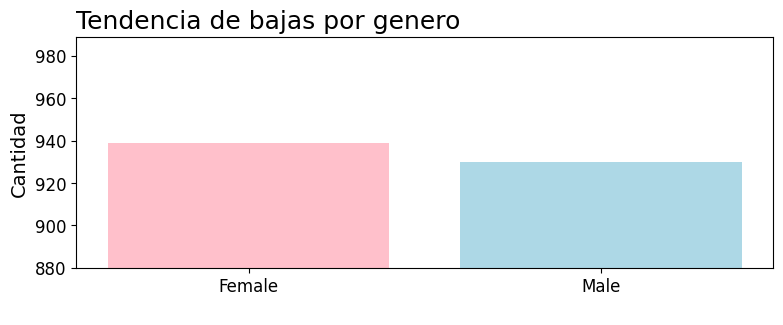

In [19]:
fig, ax = plt.subplots(figsize=(9, 3))

colors = ['pink', 'lightblue']
ax.bar(conteoG.index, conteoG, color=colors)

ax.set_title('Tendencia de bajas por genero', loc= 'left', fontsize= 18)
ax.set_xlabel(' ')
ax.set_ylabel('Cantidad', fontsize= 14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

# Modifica el eje Y para ver mejor la diferencia
ax.set_ylim(min(conteoG) - 50, max(conteoG) + 50)


plt.show()

En el grafico de arriba podemos observar que, de los usuarios que decidieron cancelar su servicio, hubo una ligera diferencia de genero: Las mujeres cancelaron mas que los hombres.

In [20]:
datosC = pd.json_normalize(datos['account'])
datosC.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [21]:
datosC.set_index(datos.index, inplace=True)
datosC

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
customerID,,,,,
0002-ORFBO,One year,Yes,Mailed check,65.60,593.3
0003-MKNFE,Month-to-month,No,Mailed check,59.90,542.4
0004-TLHLJ,Month-to-month,Yes,Electronic check,73.90,280.85
0011-IGKFF,Month-to-month,Yes,Electronic check,98.00,1237.85
0013-EXCHZ,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
9987-LUTYD,One year,No,Mailed check,55.15,742.9
9992-RRAMN,Month-to-month,Yes,Electronic check,85.10,1873.7
9992-UJOEL,Month-to-month,Yes,Mailed check,50.30,92.75


In [22]:
datosC['Churn'] = datos['Churn']
display(datosC.head())

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Churn
customerID,,,,,,
0002-ORFBO,One year,Yes,Mailed check,65.6,593.3,No
0003-MKNFE,Month-to-month,No,Mailed check,59.9,542.4,No
0004-TLHLJ,Month-to-month,Yes,Electronic check,73.9,280.85,Yes
0011-IGKFF,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes
0013-EXCHZ,Month-to-month,Yes,Mailed check,83.9,267.4,Yes


In [23]:
conteoC = datosC[datosC['Churn'] == 'Yes']['Contract'].value_counts()
print(conteoC)

Contract
Month-to-month    1655
One year           166
Two year            48
Name: count, dtype: int64


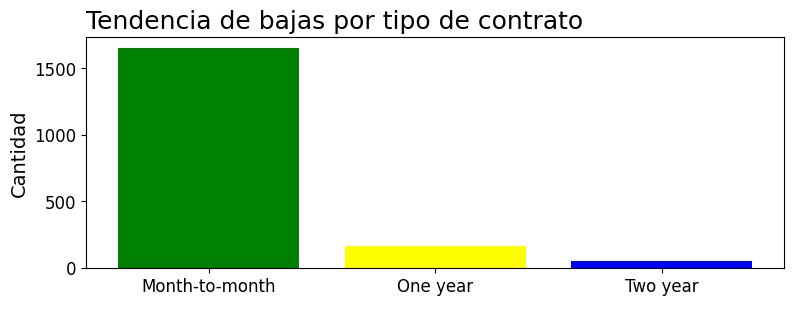

In [24]:
fig, ax = plt.subplots(figsize=(9, 3))

colors = ['green', 'yellow', 'blue']
ax.bar(conteoC.index, conteoC, color=colors)

ax.set_title('Tendencia de bajas por tipo de contrato', loc= 'left', fontsize= 18)
ax.set_xlabel(' ')
ax.set_ylabel('Cantidad', fontsize= 14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

En el grafico anterior podemos observar que, las personas que decidieron optar pon un contrato mes con mes, eran mucho mas propicios a cancelar su servicio. Es una clara diferencia contra aquellos que decidieron un contrato de un anio, y mas aun con aquellos que escogieron un contrato por dos anios, quienes presentan menos de 500 decerciones.

In [25]:
conteoMP = datosC[datosC['Churn'] == 'Yes']['PaymentMethod'].value_counts()
print(conteoMP)

PaymentMethod
Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: count, dtype: int64


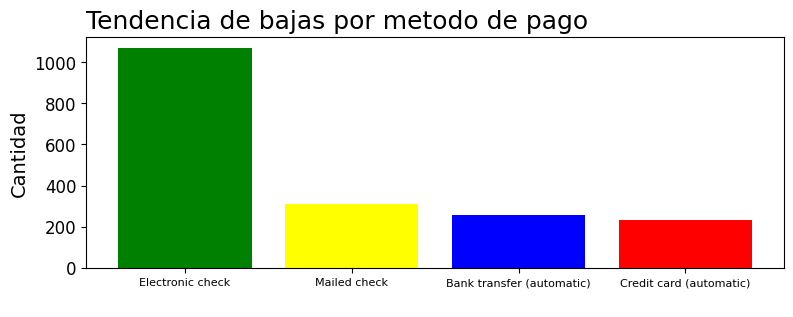

In [26]:
fig, ax = plt.subplots(figsize=(9, 3))

colors = ['green', 'yellow', 'blue', 'red']
ax.bar(conteoMP.index, conteoMP, color=colors)

ax.set_title('Tendencia de bajas por metodo de pago', loc= 'left', fontsize= 18)
ax.set_xlabel(' ')
ax.set_ylabel('Cantidad', fontsize= 14)
ax.xaxis.set_tick_params(labelsize=8)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

En el grafico podemos observar que aquellos que pagaban con cheque electronico cancelaron su servicio mucho mas que aquellos que pagaban con Cheque por mail, Transferencias bancarias y tarjeta de credito.

##Conteo de evasión por variables numéricas

In [27]:
datosC.dtypes

,0
Contract,object
PaperlessBilling,object
PaymentMethod,object
Charges.Monthly,float64
Charges.Total,object
Churn,object


In [28]:
datosC['Charges.Total'] = pd.to_numeric(datosC['Charges.Total'], errors='coerce')
display(datosC.dtypes)

,0
Contract,object
PaperlessBilling,object
PaymentMethod,object
Charges.Monthly,float64
Charges.Total,float64
Churn,object


In [29]:
datosC['Charges.Total'].mean()

np.float64(2280.6342130650496)

In [34]:
less2280 = datosC[(datosC['Churn'] == 'Yes') & (datosC['Charges.Total'] < 2280)]
most2280 = datosC[(datosC['Churn'] == 'Yes') & (datosC['Charges.Total'] >= 2280)]

print(f"Numero de bajas donde el gasto total era < 2280: {len(less2280)}")
print(f"Numero de bajas donde el gasto total era >= 2280: {len(most2280)}")


Numero de bajas donde el gasto total era < 2280: 1393
Numero de bajas donde el gasto total era >= 2280: 476


Los numeros anteriores nos indican que aquellos que gastaban menos eran quieres eran mas propensos a cancelar su servicio.

##Conclusiones
Con este analisis concluimos que las seniales de evasion son claras desde el primer momento con el cliente:

- Optan por contratos de corto tiempo.
- Eligen planes mas baratos (Debido al promedio de gasto general).
- Eligen metodos de pago sencillos, pero no automatizados, para tener un mayor control de su pago.

##Recomendaciones:
- Ofrecer mejores precios a quienes esten dispuestos a tener un contrato mas largo, algo asi como una anualidad.
- Ofrecer un procentaje de descuento o alguna optimizacion a su servicio si el usuario elige un metodo de pago automatico.